# Parte 1 - Análise Exploratória: Diagnosticando Diabetes

Neste projeto, você imaginará que é um cientista de dados interessado em explorar dados que analisam como certos fatores de diagnóstico afetam o resultado do diabetes em pacientes mulheres.

Você usuará suas Análise Exploratória para inspecionar, limpar e validar os dados.

**Observação**: Este [conjunto de dados](https://www.kaggle.com/uciml/pima-indians-diabetes-database) contém as seguintes colunas:

- `Pregnancies`: Número de gravidezes
- `Glucose`: Concentração de glicose plasmática por 2 horas em um teste oral de tolerância à glicose
- `BloodPressure`: Pressão sanguínea diastólica
- `SkinThickness`: Espessura da dobra cutânea do tríceps
- `Insulin`: insulina sérica de 2 horas
- `BMI`: Índice de massa corporal
- `DiabetesPedigreeFunction`: Função hereditária do diabetes
- `Age`: Anos de idade)
- `Outcome`: variável de classe (0 ou 1)

## Inspeção Inicial

1. Primeiro, familiarize-se com o conjunto de dados [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) . 
    
    Observe cada uma das nove colunas da documentação. 
    
    O que você espera que cada tipo de dados seja?

Tipo de dados esperado para cada coluna:

- `Pregnancies`: números inteiros 
- `Glucose`: números decimais
- `BloodPressure`: números decimais
- `SkinThickness`: números decimais
- `Insulin`: números decimais
- `BMI`: números decimais
- `DiabetesPedigreeFunction`: números decimais
- `Age`: números inteiros
- `Outcome`: número 0 ou 1

2. Em seguida, vamos carregar os dados de diabetes para começar a explorar.

    Carregue os dados em uma variável chamada `diabetes_data` e imprima as primeiras linhas.

    **Nota** : Os dados são armazenados em um arquivo chamado `diabetes.csv`.

In [1]:
import pandas as pd
import numpy as np

# ler os dados
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.tail(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


3. Quantas colunas (recursos) os dados contêm?

In [2]:
# imprime o número de colunas
numero_colunas = len(diabetes_data.columns)
numero_colunas

9

4. Quantas linhas (observações) os dados contêm?

In [3]:
# imprime o número de linhas
numero_linhas = len(diabetes_data.index)
numero_linhas

768

## Inspeção Adicional

5. Vamos inspecionar mais o `diabetes_data`.

    Alguma das colunas nos dados contém valores nulos (ausentes)?

In [4]:
# descubra se as colunas contêm valores nulos
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

6. Para investigar mais, calcule estatísticas resumidas sobre `diabetes_data` usando o método .describe().

In [5]:
# imprime estatísticas resumidas
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


7. Observando as estatísticas resumidas, você percebe algo estranho nas colunas a seguir?

- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

**Sua resposta para pergunta 7**:

Analisando essa descrição notei o nível máximo de Insulina, que é muito maior em relação aos máximos das outras colunas. Também notei o disparado enorme que tem a Insulina em pessoas com mais de 40 anos de idade (no percentil de 75%). O resto me parece estar caminhando de forma linear.


8. Vamos ver se podemos obter uma visão mais precisa dos valores ausentes nos dados.

In [6]:
# substitua instâncias de 0 por NaN
diabetes_data = diabetes_data.replace(0, np.nan)

9. Em seguida, verifique se há valores ausentes (nulos) em todas as colunas, assim como você fez na Etapa 5.

    Agora, quantos valores faltantes existem?

In [7]:
# descubra se as colunas contêm valores nulos após as substituições serem feitas
diabetes_data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

10. Vamos dar uma olhada mais de perto nessas linhas para ter uma ideia melhor de por que alguns dados podem estar faltando.

    Mostre todas as linhas que contêm valores ausentes (nulos).

In [8]:
# mostre as linhas com valores ausentes
diabetes_data[diabetes_data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9.0,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


11. Em seguida, dê uma olhada nos tipos de dados de cada coluna em `diabetes_data`.

    O resultado corresponde ao que você esperaria?

    Sim, do ponto de vista de tipagem (depois de verificar com a função ".info()"), a maioria dos dados são de tipo numérico (float64), e também há uma predominância de valores nulos na coluna Insulina.

In [9]:
# mostre os tipos dos dados usando o método .info()
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


12. Para descobrir por que a `Outcome` coluna é do tipo `object`(string) em vez do tipo `int64`, imprima os valores exclusivos na `Outcome` coluna.

In [10]:
# imprime os valores únicos da coluna Outcome
convert_outcome_values_to_int = lambda outcome_value: int(str(outcome_value).replace('O', '0'))

diabetes_data['Outcome'] = diabetes_data['Outcome'].apply(convert_outcome_values_to_int)

diabetes_data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

13. Como você pode resolver esse problema?


**Sua resposta à pergunta 13:**

Utilizei uma função anônima para converter cada valor da coluna Outcome em um número inteiro, removendo as ocorrências da letra "O" do dataframe.

# Parte 2 - Análise Exploratória - Titanic

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

titanic = pd.read_csv('titanic.csv')
titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


Um novo conjunto de dados nomeado `titanic`foi carregado. Esses dados contêm informações sobre os passageiros do Titanic, incluindo o valor que pagaram pela passagem e se sobreviveram ou não. Vamos investigar se existe uma associação entre a tarifa que um passageiro pagou (`Fare`) e se ele sobreviveu ou não (`Survived`, que é igual a `0` se o passageiro morreu e `1` se sobreviveu): 

- Calcule a diferença na tarifa média paga pelos que sobreviveram e pelos que morreram. Qual grupo pagou uma tarifa média mais alta?

- Calcule a diferença na tarifa mediana para aqueles que sobreviveram e aqueles que morreram.

- Crie um histograma da coluna idade para visualizar a distribuição das idades dos passageiros.

- Crie gráficos boxplot lado a lado de tarifas por sobrevivência. Agora que você pode ver a disseminação dos dados, as diferenças média/mediana parecem relativamente pequenas ou grandes?

- Calcule a matriz de correlação. Existe correlações entre as variáveis?

- Crie gráficos de disperção para melhor visualizar a correlação entre variáveis

- Use suas habilidades e apresente outras análises que ajudaram a entender melhor os dados 

In [12]:
# Item 01
tarifa_media_dos_que_sobreviveram = titanic.query('survived == 1')['fare'].mean()
tarifa_media_dos_que_morreram = titanic.query('survived == 0')['fare'].mean()

diferenca_na_tarifa_media = tarifa_media_dos_que_sobreviveram - tarifa_media_dos_que_morreram
diferenca_na_tarifa_media


27.952570496161364

In [13]:
# Item 02
tarifa_mediana_dos_que_sobreviveram = titanic.query('survived == 1')['fare'].median()
tarifa_mediana_dos_que_morreram = titanic.query('survived == 0')['fare'].median()

diferenca_na_tarifa_mediana = tarifa_mediana_dos_que_sobreviveram - tarifa_mediana_dos_que_morreram
diferenca_na_tarifa_mediana

15.5

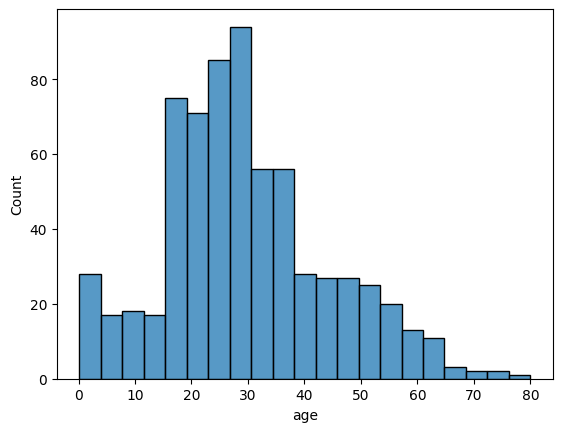

<Figure size 640x480 with 0 Axes>

In [14]:
# Item 03
sns.histplot(x='age', data=titanic)
plt.show()
plt.clf()

<AxesSubplot:xlabel='survived', ylabel='fare'>

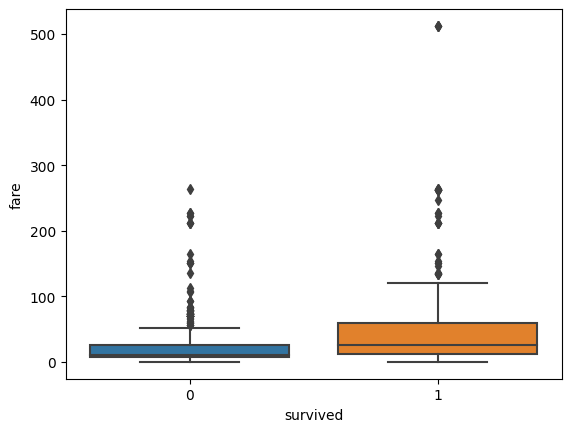

In [15]:
# Item 04
sns.boxplot(data=titanic, x='survived', y='fare')

In [16]:
# Item 05 - Olhando de maneira geral para o dataset, as colunas possuem baixa correlação.
matriz_correlacao = titanic.corr()
matriz_correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_895/4274603057.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  matriz_correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)


,passenger_id,pclass,age,sibsp,parch,fare,body,survived
passenger_id,1.00,0.90,-0.34,0.10,-0.00,-0.48,-0.03,-0.31
pclass,0.90,1.00,-0.41,0.07,-0.01,-0.56,-0.09,-0.33
age,-0.34,-0.41,1.00,-0.25,-0.16,0.19,0.17,-0.04
sibsp,0.10,0.07,-0.25,1.00,0.39,0.14,-0.12,-0.04
parch,-0.00,-0.01,-0.16,0.39,1.00,0.25,0.13,0.06
fare,-0.48,-0.56,0.19,0.14,0.25,1.00,-0.08,0.25
body,-0.03,-0.09,0.17,-0.12,0.13,-0.08,1.00,nan
survived,-0.31,-0.33,-0.04,-0.04,0.06,0.25,nan,1.00


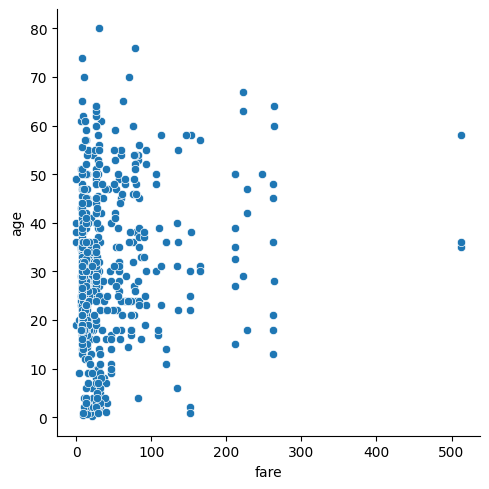

In [17]:
# Item 06 e 07 - Parte 1 - Valor da taxa pela idade
sns.relplot(data=titanic, x='fare', y='age')

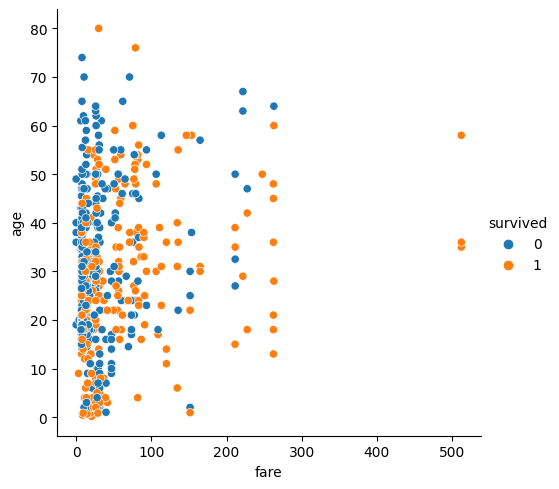

In [18]:
# Item 06 e 07 - Parte 2 - Valor da taxa pela idade destacando os sobreviventes e não sobreviventes
sns.relplot(data=titanic, x='fare', y='age', hue='survived')

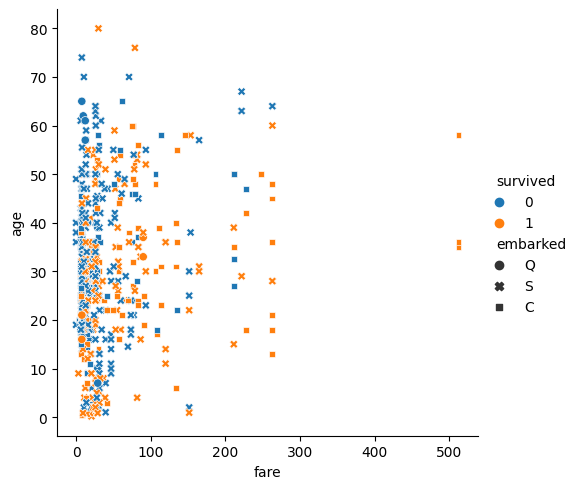

In [19]:
# Item 06 e 07 - Parte 3 - Valor da taxa pela idade destacando os sobreviventes e não sobreviventes junto com o porto de embarque (vendo se poderia ter alguma relação, talvez passageiros de determinadas regiões poderiam hospedadas em lugares mais críticos do titanic no momento do acidente)
sns.relplot(data=titanic, x='fare', y='age', hue='survived', style='embarked')

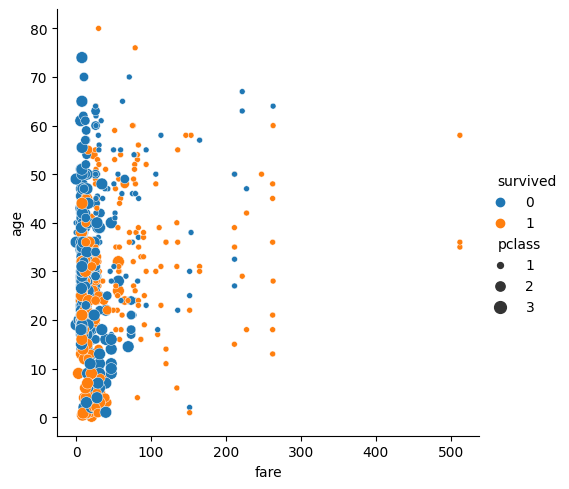

In [20]:
# Item 06 e 07 - Parte 4 - Valor da taxa pela idade destacando os sobreviventes e não sobreviventes junto com a "classe" do ticket (não entendi ao certo o que significa a classe do ticket, imagino que seja o quão premium possa ser o local de hospedagem, consequentemente mais seguro, influenciando na taxa de sobrevivência talvez)
sns.relplot(data=titanic, x='fare', y='age', hue='survived', size='pclass')

/home/victor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


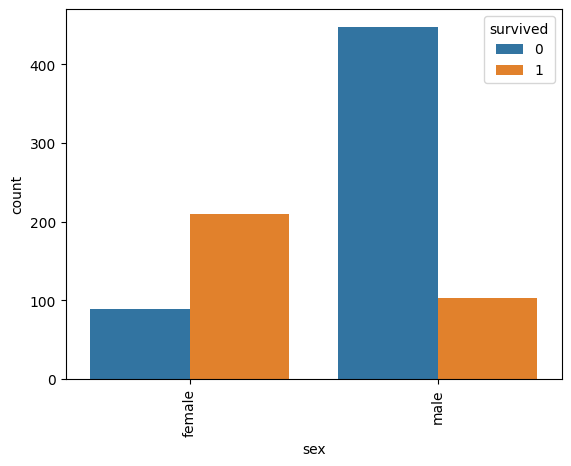

In [26]:
# Item 06 e 07 - Parte 5 - Quantidade de sobreviventes e não sobreviventes de acordo com o sexo.
sns.countplot(titanic['sex'], hue=titanic['survived'])
plt.xticks(rotation=90);
plt.show()

<AxesSubplot:>

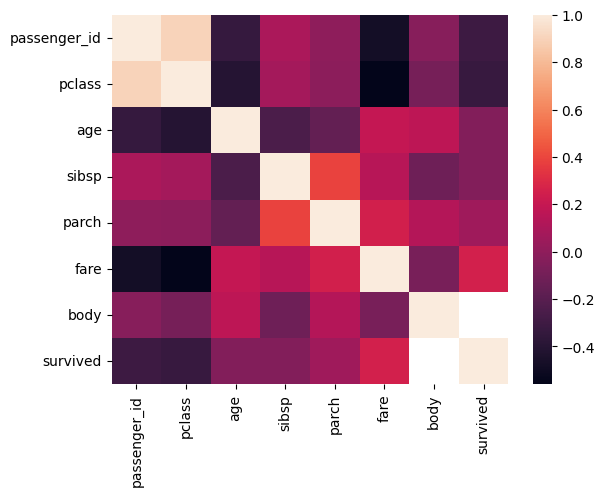

In [24]:
# Item 06 e 07 - Parte 6 - Mapa de calor listando a correlação entres as colunas, semelhante ao que já fizemos
sns.heatmap(titanic.corr())

# Fim